In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Buyouts_Funds

##### ignore

In [ ]:
#df = pd.read_csv('Buyouts_Funds.csv')

In [ ]:
#df.shape

In [ ]:
#df.head()

In [ ]:
#df.drop(columns ='FundManagerID', axis = 1, inplace = True)

In [ ]:
#df.head()

In [ ]:
#df.columns =[
#   'fund_id',
#    'fund_name',
#    'fund_manager',
#    'strategy',
#    'region',
#    'sector',
#    'vintage_year',
#    'year_opened',
#    'month_launched',
#    'target_size',
#    'currency',
#]

In [ ]:
#list_col =  df.columns.to_list()
#df = df.reindex(columns= list_col)

In [ ]:
#df.head()

In [ ]:
#df['month_launched']=df['month_launched'].apply(str)

In [ ]:
#df['year_opened']=df['year_opened'].apply(str)

In [ ]:
#df['open_date'] = df['year_opened']+ '-' + df['month_launched']

In [ ]:
#df.drop(columns =['month_launched','year_opened'], axis = 1, inplace = True)

In [ ]:
#df.head()

In [ ]:
#df.shape

In [ ]:
#df['north_america'] = df.region.apply(lambda s :\
#                        1.0 if 'north america' in s.lower() else 0.0)

In [ ]:
#df.head()

In [ ]:
#df[df.north_america !=1]

In [ ]:
#po_ef= df[(df.target_size<=250000000) & (df.north_america !=0)]

In [ ]:
#po_ef.drop(columns ='north_america', axis = 1, inplace = True)

In [ ]:
#po_ef

In [ ]:
#df[df.target_size.isna() ]

In [ ]:
#df1 = pd.read_csv('funds_3NF.csv')

In [ ]:
#df1.head()

In [ ]:
#df1['sector'].unique()

In [ ]:
#df1.sector= df1.sector.str.strip()

In [ ]:
#df1.strategy.unique()

In [ ]:
#df1.strategy= df1.strategy.str.strip()

In [ ]:
#df1.groupby('sector')['sector'].count()

##### correct version

In [129]:
df3 = pd.read_csv('buyouts_funds/buyouts_funds_csv/buyouts_funds_uncleaned.csv')

In [130]:
df3.head()

fund_id                                      name  \
0    34866               Ascent Venture Partners VII   
1    36284     Fall Line Endurance Fund (Open-Ended)   
2    36284     Fall Line Endurance Fund (Open-Ended)   
3    39769  Star Mountain U.S. LMM Secondary Fund II   
4    43372                 Waterfall Sentinel Fund I   

                      manager  managerId       sectors  vintageYear  \
0     Ascent Venture Partners       6381           TMT       2020.0   
1           Fall Line Capital      15168           TMT       2019.0   
2           Fall Line Capital      15168  Agribusiness       2019.0   
3       Star Mountain Capital       1671   Diversified       2020.0   
4  Waterfall Asset Management      19136   Diversified       2019.0   

         regions      countries               status  \
0  North America  United States             Launched   
1  North America  United States  Currently Investing   
2  North America  United States  Currently Investing   
3  North America  United States  Currently Investing   
4  North America  United States  Currently Investing   

                          strategies  yearOpen  targetFundSize.amount  \
0    Venture Capital / Growth Equity    2020.0            150000000.0   
1    Venture Capital / Growth Equity    2016.0                    NaN   
2    Venture Capital / Growth Equity    2016.0                    NaN   
3                        Secondaries    2020.0            500000000.0   
4  Buyout / Corporate Private Equity    2019.0            300000000.0   

  targetFundSize.currency  monthOpen  fundSize.amount fundSize.currency  \
0                     USD        NaN              NaN               NaN   
1                     NaN        7.0      285000000.0               USD   
2                     NaN        7.0      285000000.0               USD   
3                     USD       12.0      200000000.0               USD   
4                     USD        1.0       80000000.0               USD   

       stage  yearClose  monthClose  
0        NaN        NaN         NaN  
1        NaN        NaN         NaN  
2        NaN        NaN         NaN  
3  1st Close        NaN         NaN  
4  1st Close        NaN         NaN

In [131]:
df3.rename(columns={'managerId':'manager_id', 'sectors':'sector', 'vintageYear':'vintage_year',
                   'regions':'region', 'countries':'country', 'strategies':'strategy',
                   'yearOpen':'year_open', 'targetFundSize.amount':'target_fund_size_amt',
                   'targetFundSize.currency':'target_fund_size_currency', 'monthOpen':'month_open',
                   'fundSize.amount':'fund_size_amt', 'fundSize.currency':'fund_currency',
                   'yearClose':'year_close', 'monthClose':'month_close'}, inplace=True)
df3.head()

fund_id                                      name  \
0    34866               Ascent Venture Partners VII   
1    36284     Fall Line Endurance Fund (Open-Ended)   
2    36284     Fall Line Endurance Fund (Open-Ended)   
3    39769  Star Mountain U.S. LMM Secondary Fund II   
4    43372                 Waterfall Sentinel Fund I   

                      manager  manager_id        sector  vintage_year  \
0     Ascent Venture Partners        6381           TMT        2020.0   
1           Fall Line Capital       15168           TMT        2019.0   
2           Fall Line Capital       15168  Agribusiness        2019.0   
3       Star Mountain Capital        1671   Diversified        2020.0   
4  Waterfall Asset Management       19136   Diversified        2019.0   

          region        country               status  \
0  North America  United States             Launched   
1  North America  United States  Currently Investing   
2  North America  United States  Currently Investing   
3  North America  United States  Currently Investing   
4  North America  United States  Currently Investing   

                            strategy  year_open  target_fund_size_amt  \
0    Venture Capital / Growth Equity     2020.0           150000000.0   
1    Venture Capital / Growth Equity     2016.0                   NaN   
2    Venture Capital / Growth Equity     2016.0                   NaN   
3                        Secondaries     2020.0           500000000.0   
4  Buyout / Corporate Private Equity     2019.0           300000000.0   

  target_fund_size_currency  month_open  fund_size_amt fund_currency  \
0                       USD         NaN            NaN           NaN   
1                       NaN         7.0    285000000.0           USD   
2                       NaN         7.0    285000000.0           USD   
3                       USD        12.0    200000000.0           USD   
4                       USD         1.0     80000000.0           USD   

       stage  year_close  month_close  
0        NaN         NaN          NaN  
1        NaN         NaN          NaN  
2        NaN         NaN          NaN  
3  1st Close         NaN          NaN  
4  1st Close         NaN          NaN

In [132]:
df3 = df3[['fund_id', 'name', 'manager_id', 'strategy', 'sector', 'region',
          'country', 'target_fund_size_amt', 'target_fund_size_currency',
          'fund_size_amt', 'fund_currency', 'status', 'stage',
          'vintage_year', 'month_open', 'year_open', 'month_close', 'year_close']]
df3.head()

fund_id                                      name  manager_id  \
0    34866               Ascent Venture Partners VII        6381   
1    36284     Fall Line Endurance Fund (Open-Ended)       15168   
2    36284     Fall Line Endurance Fund (Open-Ended)       15168   
3    39769  Star Mountain U.S. LMM Secondary Fund II        1671   
4    43372                 Waterfall Sentinel Fund I       19136   

                            strategy        sector         region  \
0    Venture Capital / Growth Equity           TMT  North America   
1    Venture Capital / Growth Equity           TMT  North America   
2    Venture Capital / Growth Equity  Agribusiness  North America   
3                        Secondaries   Diversified  North America   
4  Buyout / Corporate Private Equity   Diversified  North America   

         country  target_fund_size_amt target_fund_size_currency  \
0  United States           150000000.0                       USD   
1  United States                   NaN                       NaN   
2  United States                   NaN                       NaN   
3  United States           500000000.0                       USD   
4  United States           300000000.0                       USD   

   fund_size_amt fund_currency               status      stage  vintage_year  \
0            NaN           NaN             Launched        NaN        2020.0   
1    285000000.0           USD  Currently Investing        NaN        2019.0   
2    285000000.0           USD  Currently Investing        NaN        2019.0   
3    200000000.0           USD  Currently Investing  1st Close        2020.0   
4     80000000.0           USD  Currently Investing  1st Close        2019.0   

   month_open  year_open  month_close  year_close  
0         NaN     2020.0          NaN         NaN  
1         7.0     2016.0          NaN         NaN  
2         7.0     2016.0          NaN         NaN  
3        12.0     2020.0          NaN         NaN  
4         1.0     2019.0          NaN         NaN

In [136]:
df3['month_open'] = df3['month_open'].fillna(0)
df3['year_open'] = df3['year_open'].fillna(0)
df3['month_close'] = df3['month_close'].fillna(0)
df3['year_close'] = df3['year_close'].fillna(0)
df3['vintage_year'] = df3['vintage_year'].fillna(0)

In [137]:
df3['month_open'] = df3['month_open'].apply(int)
df3['year_open'] = df3['year_open'].apply(int)
df3['month_close'] = df3['month_close'].apply(int)
df3['year_close'] = df3['year_close'].apply(int)
df3['vintage_year'] = df3['vintage_year'].apply(int)

In [138]:
df3['month_open'] = df3['month_open'].apply(str)
df3['year_open'] = df3['year_open'].apply(str)
df3['month_close'] = df3['month_close'].apply(str)
df3['year_close'] = df3['year_close'].apply(str)
df3['vintage_year'] = df3['vintage_year'].apply(str)

In [139]:
df3['open_date'] = df3['year_open'] + '-' + df3['month_open']
df3['close_date'] = df3['year_close'] + '-' + df3['month_close']

In [140]:
df3.drop(columns=['month_open', 'year_open', 'month_close', 
                 'year_close', 'close_date'], axis=1, inplace=True)
df3.head()

fund_id                                      name  manager_id  \
0    34866               Ascent Venture Partners VII        6381   
1    36284     Fall Line Endurance Fund (Open-Ended)       15168   
2    36284     Fall Line Endurance Fund (Open-Ended)       15168   
3    39769  Star Mountain U.S. LMM Secondary Fund II        1671   
4    43372                 Waterfall Sentinel Fund I       19136   

                            strategy        sector         region  \
0    Venture Capital / Growth Equity           TMT  North America   
1    Venture Capital / Growth Equity           TMT  North America   
2    Venture Capital / Growth Equity  Agribusiness  North America   
3                        Secondaries   Diversified  North America   
4  Buyout / Corporate Private Equity   Diversified  North America   

         country  target_fund_size_amt target_fund_size_currency  \
0  United States           150000000.0                       USD   
1  United States                   NaN                       NaN   
2  United States                   NaN                       NaN   
3  United States           500000000.0                       USD   
4  United States           300000000.0                       USD   

   fund_size_amt fund_currency               status      stage vintage_year  \
0            NaN           NaN             Launched        NaN         2020   
1    285000000.0           USD  Currently Investing        NaN         2019   
2    285000000.0           USD  Currently Investing        NaN         2019   
3    200000000.0           USD  Currently Investing  1st Close         2020   
4     80000000.0           USD  Currently Investing  1st Close         2019   

  open_date  
0    2020-0  
1    2016-7  
2    2016-7  
3   2020-12  
4    2019-1

In [141]:
df3 = df3[df3.region == 'North America']
df3.head()

fund_id                                      name  manager_id  \
0    34866               Ascent Venture Partners VII        6381   
1    36284     Fall Line Endurance Fund (Open-Ended)       15168   
2    36284     Fall Line Endurance Fund (Open-Ended)       15168   
3    39769  Star Mountain U.S. LMM Secondary Fund II        1671   
4    43372                 Waterfall Sentinel Fund I       19136   

                            strategy        sector         region  \
0    Venture Capital / Growth Equity           TMT  North America   
1    Venture Capital / Growth Equity           TMT  North America   
2    Venture Capital / Growth Equity  Agribusiness  North America   
3                        Secondaries   Diversified  North America   
4  Buyout / Corporate Private Equity   Diversified  North America   

         country  target_fund_size_amt target_fund_size_currency  \
0  United States           150000000.0                       USD   
1  United States                   NaN                       NaN   
2  United States                   NaN                       NaN   
3  United States           500000000.0                       USD   
4  United States           300000000.0                       USD   

   fund_size_amt fund_currency               status      stage vintage_year  \
0            NaN           NaN             Launched        NaN         2020   
1    285000000.0           USD  Currently Investing        NaN         2019   
2    285000000.0           USD  Currently Investing        NaN         2019   
3    200000000.0           USD  Currently Investing  1st Close         2020   
4     80000000.0           USD  Currently Investing  1st Close         2019   

  open_date  
0    2020-0  
1    2016-7  
2    2016-7  
3   2020-12  
4    2019-1

In [142]:
df3_ef = df3[df3.target_fund_size_amt <= 250000000]
df3_ef.head()

fund_id                              name  manager_id  \
0     34866       Ascent Venture Partners VII        6381   
5     43446            Volunteer Park Capital       19143   
16    44723       Flashstarts Blockchain Fund       14468   
17    44727               Harmony Partners IV       10317   
18    44738  Light Street Beacon Principals I       19412   

                           strategy       sector         region  \
0   Venture Capital / Growth Equity          TMT  North America   
5                  Mezzanine / Debt  Diversified  North America   
16  Venture Capital / Growth Equity          TMT  North America   
17  Venture Capital / Growth Equity          TMT  North America   
18  Venture Capital / Growth Equity          TMT  North America   

          country  target_fund_size_amt target_fund_size_currency  \
0   United States           150000000.0                       USD   
5             NaN           200000000.0                       USD   
16  United States             6000000.0                       USD   
17  United States           125000000.0                       USD   
18  United States            20000000.0                       USD   

    fund_size_amt fund_currency               status      stage vintage_year  \
0             NaN           NaN             Launched        NaN         2020   
5      30000000.0           USD  Currently Investing  1st Close         2019   
16            NaN           NaN             Launched        NaN         2019   
17            NaN           NaN             Launched        NaN         2019   
18            NaN           NaN             Launched        NaN         2019   

   open_date  
0     2020-0  
5     2019-8  
16    2019-1  
17    2019-1  
18    2019-1

In [143]:
df3_ef.sector = df3_ef.sector.str.strip()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [144]:
df3_ef.sector.unique()

array(['TMT', 'Diversified', 'Consumer Goods', 'Business Services',
       'Other', 'Financial Services', 'Healthcare', 'Energy / Oil & Gas',
       'Agribusiness', 'Biotech / Life Science', 'Retail',
       'Natural Resources', 'Leisure', 'Transport', 'Industrials',
       'Manufacturing', 'Clean Tech / Renewable'], dtype=object)

In [145]:
df3_ef.strategy = df3_ef.strategy.str.strip()

In [146]:
df3_ef.strategy.unique()

array(['Venture Capital / Growth Equity', 'Mezzanine / Debt',
       'Buyout / Corporate Private Equity', 'Secondaries',
       'Fund of Funds / Co-Investment', 'Distressed / Turnaround',
       'Other'], dtype=object)

In [147]:
df3_ef.groupby('sector')['sector'].count()

sector
Agribusiness               32
Biotech / Life Science     76
Business Services          41
Clean Tech / Renewable     29
Consumer Goods            101
Diversified               222
Energy / Oil & Gas         32
Financial Services         62
Healthcare                109
Industrials                23
Leisure                     7
Manufacturing              14
Natural Resources           4
Other                      42
Retail                     17
TMT                       555
Transport                  17
Name: sector, dtype: int64

In [148]:
df3_ef.groupby('strategy')['strategy'].count()

strategy
Buyout / Corporate Private Equity     173
Distressed / Turnaround                10
Fund of Funds / Co-Investment          54
Mezzanine / Debt                       53
Other                                   1
Secondaries                            19
Venture Capital / Growth Equity      1073
Name: strategy, dtype: int64

In [149]:
df3_ef

fund_id                                   name  manager_id  \
0       34866            Ascent Venture Partners VII        6381   
5       43446                 Volunteer Park Capital       19143   
16      44723            Flashstarts Blockchain Fund       14468   
17      44727                    Harmony Partners IV       10317   
18      44738       Light Street Beacon Principals I       19412   
...       ...                                    ...         ...   
6932    62118                    Kin Ventures Fund I       23053   
6934    62121  Fintech Collective Opportunity Fund I       18127   
6935    62121  Fintech Collective Opportunity Fund I       18127   
6940    62126                    Amen Capital Fund I       23054   
6941    62126                    Amen Capital Fund I       23054   

                             strategy              sector         region  \
0     Venture Capital / Growth Equity                 TMT  North America   
5                    Mezzanine / Debt         Diversified  North America   
16    Venture Capital / Growth Equity                 TMT  North America   
17    Venture Capital / Growth Equity                 TMT  North America   
18    Venture Capital / Growth Equity                 TMT  North America   
...                               ...                 ...            ...   
6932  Venture Capital / Growth Equity                 TMT  North America   
6934  Venture Capital / Growth Equity  Financial Services  North America   
6935  Venture Capital / Growth Equity                 TMT  North America   
6940  Venture Capital / Growth Equity  Financial Services  North America   
6941  Venture Capital / Growth Equity                 TMT  North America   

            country  target_fund_size_amt target_fund_size_currency  \
0     United States           150000000.0                       USD   
5               NaN           200000000.0                       USD   
16    United States             6000000.0                       USD   
17    United States           125000000.0                       USD   
18    United States            20000000.0                       USD   
...             ...                   ...                       ...   
6932            NaN           100000000.0                       USD   
6934            NaN           100000000.0                       USD   
6935            NaN           100000000.0                       USD   
6940            NaN            25000000.0                       USD   
6941            NaN            25000000.0                       USD   

      fund_size_amt fund_currency               status      stage  \
0               NaN           NaN             Launched        NaN   
5        30000000.0           USD  Currently Investing  1st Close   
16              NaN           NaN             Launched        NaN   
17              NaN           NaN             Launched        NaN   
18              NaN           NaN             Launched        NaN   
...             ...           ...                  ...        ...   
6932            NaN           NaN             Launched        NaN   
6934            NaN           NaN             Launched        NaN   
6935            NaN           NaN             Launched        NaN   
6940      2340000.0           USD  Currently Investing  1st Close   
6941      2340000.0           USD  Currently Investing  1st Close   

     vintage_year open_date  
0            2020    2020-0  
5            2019    2019-8  
16           2019    2019-1  
17           2019    2019-1  
18           2019    2019-1  
...           ...       ...  
6932         2022    2022-4  
6934         2022    2022-4  
6935         2022    2022-4  
6940         2021    2022-3  
6941         2021    2022-3  

[1383 rows x 15 columns]

In [150]:
df3_ef.to_csv('buyouts_funds/buyouts_funds_csv/buyouts_funds_final.csv')

In [151]:
buyouts_funds_id = df3.filter(['manager', 'manager_id'], axis=1)
buyouts_funds_id.head()

manager_id
0        6381
1       15168
2       15168
3        1671
4       19136

In [153]:
buyouts_funds_id.to_csv('buyouts_funds/buyouts_funds_csv/buyouts_funds_id.csv')

### Buyouts_LP

In [159]:
df2 = pd.read_csv('buyouts_lp/buyouts_lp_csv/lp_1NF.csv')

In [160]:
df2.head()

lp_id                      lp_name                       type  type_id  \
0      3             Abell Foundation     Foundation / Endowment        5   
1      4                     ABN AMRO  Bank / Financial Services       25   
2      5  Stichting Pensioenfonds ABP        Public Pension Fund       12   
3      8                    AEGON USA          Insurance Company        8   
4      9                        Aetna       Private Pension Fund       26   

   asset_amount currency    hq_city      hq_country  
0  3.586300e+08      USD  Baltimore   United States  
1  4.199500e+11      EUR  Amsterdam     Netherlands  
2  5.500000e+11      EUR    Heerlen     Netherlands  
3           NaN      NaN  Baltimore   United States  
4  5.710000e+09      USD   Hartford   United States

In [161]:
df2.drop(columns ='type_id', axis = 1, inplace = True)

In [162]:
df2.hq_country= df2.hq_country.str.strip()

In [163]:
lp_us = df2[df2['hq_country']=='United States']

<AxesSubplot:xlabel='count', ylabel='type'>

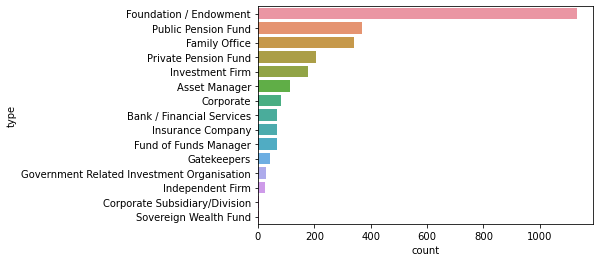

In [164]:
sns.countplot(y ='type', data = lp_us, order=lp_us['type'].value_counts().index)

In [166]:
lp_us.to_csv('buyouts_lp/buyouts_lp_csv/buyouts_lp_final.csv')

In [167]:
lp_us_id = lp_us.filter(['type', 'type_id'], axis=1)
lp_us_id.head()

type
0  Foundation / Endowment
3       Insurance Company
4    Private Pension Fund
6     Public Pension Fund
7     Public Pension Fund

In [169]:
lp_us_id.to_csv('buyouts_lp/buyouts_lp_csv/buyouts_lp_type.csv')

In [ ]:
#df3 = pd.read_csv('buyouts_lp/lp_sector.csv')

In [ ]:
#df3.head()

In [ ]:
#lp_inner = df2.merge(df3, left_on='lp_id',right_on='lp_id')

In [ ]:
#lp_inner.head()

In [ ]:
#lp_inner.hasAppetite.unique()

In [ ]:
#lp_sector = lp_inner[(lp_inner.hasAppetite)==True]

In [ ]:
#lp_sec_info = lp_sector[lp_sector.hq_country=='United States']

In [ ]:
#lp_sec_info

In [ ]:
#sns.countplot(y = 'sector', data = lp_sec_info, order=lp_sec_info['sector'].value_counts().index)

In [ ]:
#df4 = pd.read_csv('buyouts_lp/lp_strategy.csv')

In [ ]:
#df4.head()

In [ ]:
#lp_in = df2.merge(df4, left_on='lp_id',right_on='lp_id')

In [ ]:
#lp_in.head()

In [ ]:
#lp_strat_info = lp_in[(lp_in.regions == 'North America')]

In [ ]:
#lp_strat_info

In [ ]:
#sns.countplot(y = 'strategy', data = lp_strat_info, order=lp_strat_info['strategy'].value_counts().index)

In [ ]:
#lp_us_copy = lp_us.sort_values('asset_amount', ascending=False)
#lp_us_copy.head()

In [ ]:
#plt.barh(lp_us_copy['type'], lp_us_copy['asset_amount'])
#ax1 = plt.gca()
#ax1.invert_yaxis()
#plt.show()